<a href="https://colab.research.google.com/github/SiriNadig/PRODIGY_DS_02/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/sales.csv'

import pandas as pd
df = pd.read_csv(file_path)

Mounted at /content/drive


In [10]:
# Handle Missing Values
# Check for missing values
print(df.isnull().sum())

# Using .loc
df.loc[:, 'Product_Category_2'] = df['Product_Category_2'].fillna(0)
df.loc[:, 'Product_Category_3'] = df['Product_Category_3'].fillna(0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [7]:
print(df.describe()) # For numerical columns
print(df.describe(include=['object'])) # For categorical columns

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       550068.000000       550068.000000  550068.000000  
mean             6.735436            3.841941    9263.968713  
std              6.215492            6.250712    5023.065394  
min              0.000000            0.000000      12.000000  
25%              0

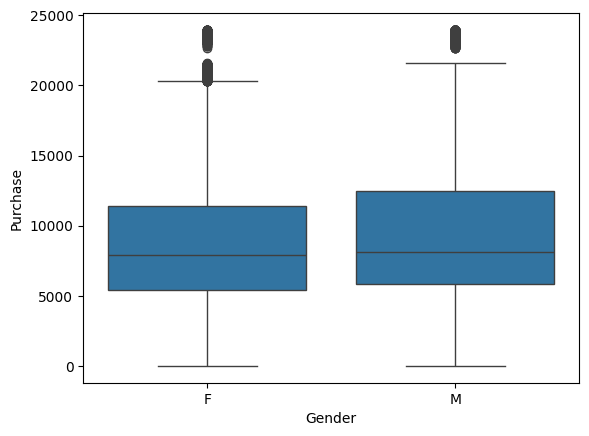

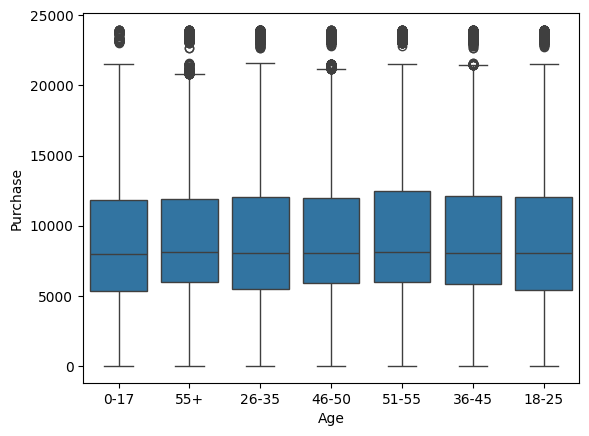

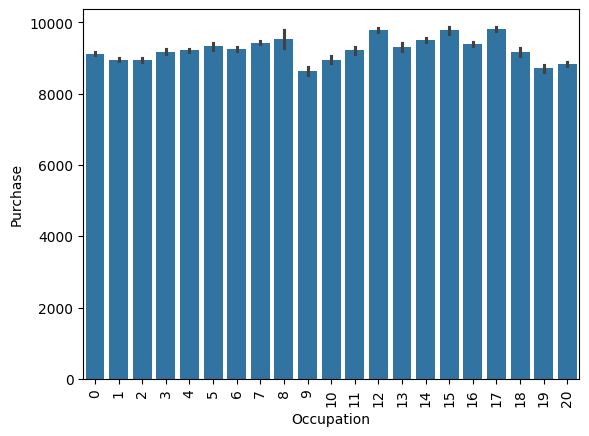

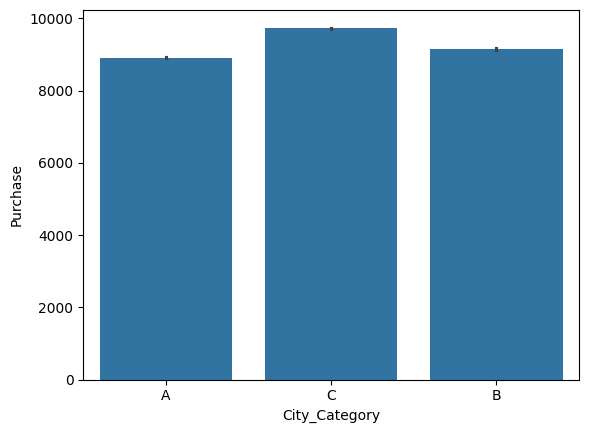

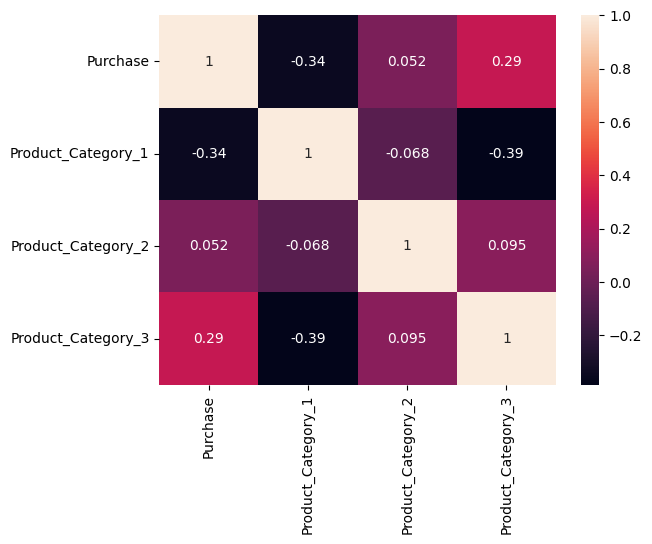

In [8]:
# Distribution of Purchase by Gender
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.show()

# Distribution of Purchase by Age Group
sns.boxplot(x='Age', y='Purchase', data=df)
plt.show()

# Relationship between Occupation and Purchase
sns.barplot(x='Occupation', y='Purchase', data=df)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

# Purchase Distribution across City Categories
sns.barplot(x='City_Category', y='Purchase', data=df)
plt.show()

# Correlation between Numerical Features (if applicable)
numerical_features = ['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()

Gender  Age  
F       0-17     8338.771985
        18-25    8343.180201
        26-35    8728.251754
        36-45    8959.844056
        46-50    8842.098947
        51-55    9042.449666
        55+      9007.036199
M       0-17     9235.173670
        18-25    9440.942971
        26-35    9410.337578
        36-45    9453.193643
        46-50    9357.471509
        51-55    9705.094802
        55+      9438.195603
Name: Purchase, dtype: float64
Product_Category_1
1     1910013754
2      268516186
3      204084713
4       27380488
5      941835229
6      324150302
7       60896731
8      854318799
9        6370324
10     100837301
11     113791115
12       5331844
13       4008601
14      20014696
15      92969042
16     145120612
17       5878699
18       9290201
19         59378
20        944727
Name: Purchase, dtype: int64


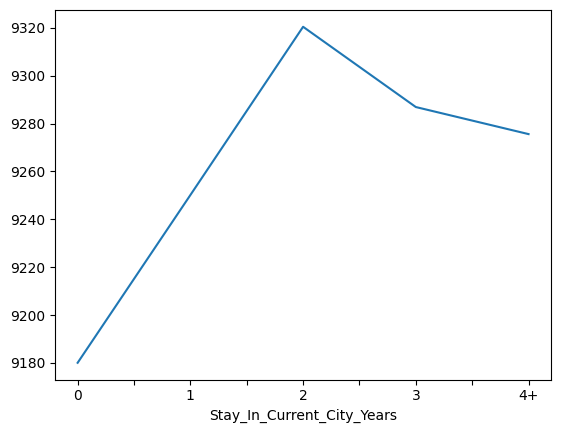

In [9]:
# Average Purchase by Gender and Age Group
avg_purchase = df.groupby(['Gender', 'Age'])['Purchase'].mean()
print(avg_purchase)

# Total Purchase by Product Category
total_purchase_by_category = df.groupby('Product_Category_1')['Purchase'].sum()
print(total_purchase_by_category)

# Purchase Trend over Stay Duration in Current City
purchase_trend = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
purchase_trend.plot()
plt.show()